Columns in the dataset: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Encoded 'Gender' column:
   Gender
0       0
1       0
2       1
3       1
4       1


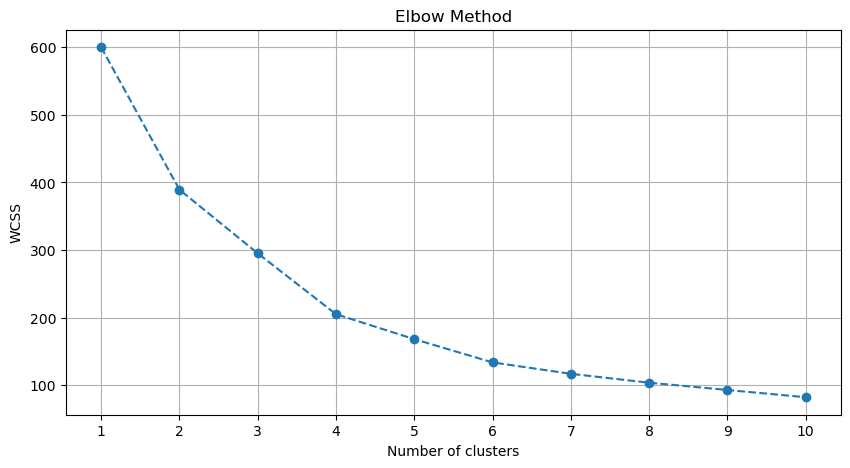

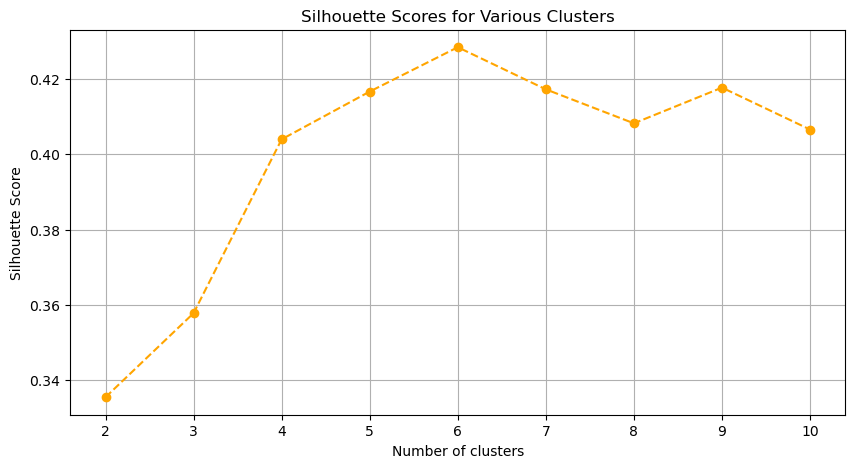

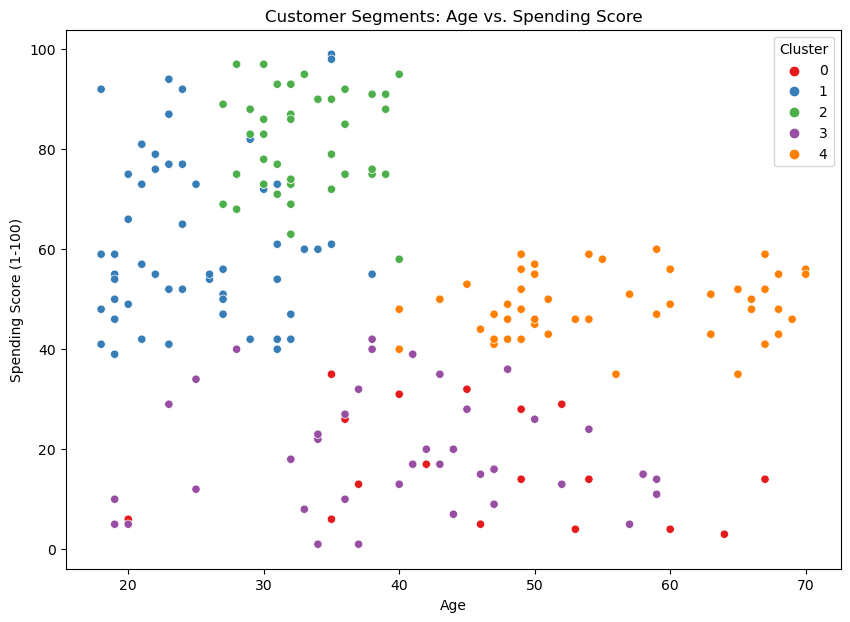

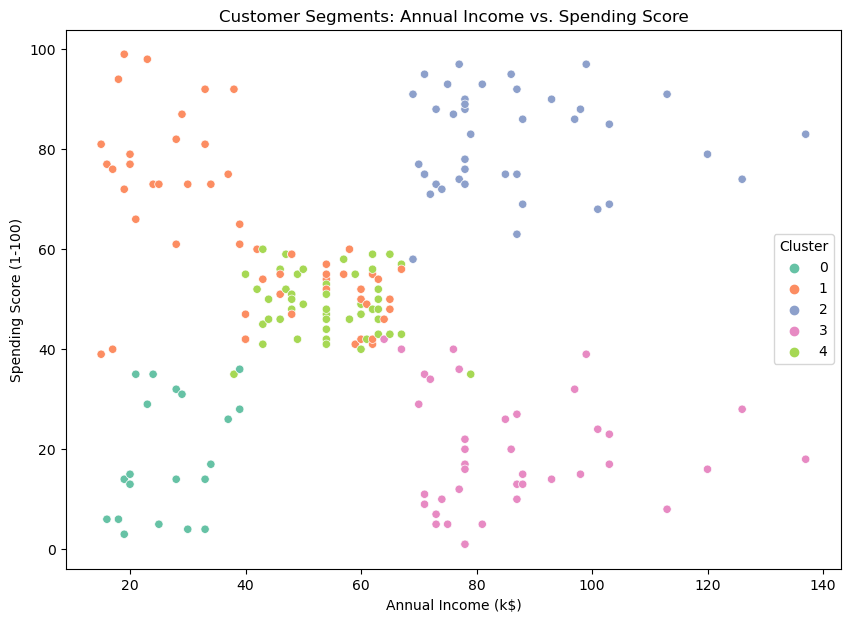

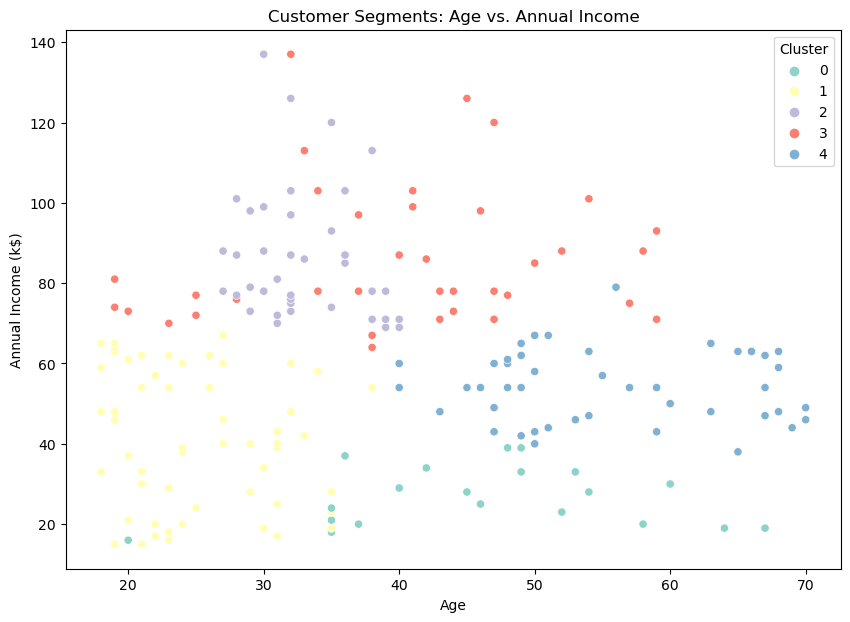


Cluster Summary:
         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         24.100000  0.600000  46.250000           26.750000   
1         55.648148  0.592593  25.185185           41.092593   
2        161.025000  0.550000  32.875000           86.100000   
3        159.743590  0.487179  39.871795           86.102564   
4         83.872340  0.574468  55.638298           54.382979   

         Spending Score (1-100)  
Cluster                          
0                     18.350000  
1                     62.240741  
2                     81.525000  
3                     19.358974  
4                     48.851064  

Number of customers in each cluster:
Cluster
1    54
4    47
2    40
3    39
0    20
Name: count, dtype: int64

Clustered data has been saved to 'Customer_Segments.csv'.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Display column names to verify
print("Columns in the dataset:", data.columns.tolist())
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Data preprocessing
# Encode 'Gender' column
if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    print("\nEncoded 'Gender' column:")
    print(data[['Gender']].head())
else:
    print("\n'Gender' column not found in the dataset.")
    # Handle accordingly, e.g., remove the encoding step or use different columns

# Feature Selection
# Decide whether to include 'Gender' or not based on your analysis
# Here, we'll exclude 'Gender' for simplicity
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Determine optimal number of clusters using Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Scores for Various Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# From the Elbow and Silhouette methods, decide on the number of clusters
# For example, let's assume 5 clusters based on previous analysis
optimal_clusters = 5

# Applying K-means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
data['Cluster'] = cluster_labels

# Visualizations
plt.figure(figsize=(10,7))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segments: Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10,7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set2')
plt.title('Customer Segments: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10,7))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=data, palette='Set3')
plt.title('Customer Segments: Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster')
plt.show()

# Cluster analysis
cluster_summary = data.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)

# Display counts per cluster
print("\nNumber of customers in each cluster:")
print(data['Cluster'].value_counts())

# Save the clustered data
data.to_csv('Customer_Segments.csv', index=False)
print("\nClustered data has been saved to 'Customer_Segments.csv'.")                                                                                                    